# Exploratory Data Analysis
In this script we wish to explore the dataset and analysis on the features

In [2]:
# Import useful packages
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%load_ext autoreload
%autoreload 2

In [365]:
# Import custom functions
from scripts.proj1_helpers import *
from scripts.clean_data import *
from scripts.plots import *


In [353]:
data_path = 'data/train.csv'
y, x, ids = load_csv_data(data_path, sub_sample=False)

print('Size of x:', x.shape )

Size of x: (250000, 30)


In [354]:
print(x)
x[x == -999] = np.nan
print(x)

[[ 138.47    51.655   97.827 ...    1.24    -2.475  113.497]
 [ 160.937   68.768  103.235 ... -999.    -999.      46.226]
 [-999.     162.172  125.953 ... -999.    -999.      44.251]
 ...
 [ 105.457   60.526   75.839 ... -999.    -999.      41.992]
 [  94.951   19.362   68.812 ... -999.    -999.       0.   ]
 [-999.      72.756   70.831 ... -999.    -999.       0.   ]]
[[138.47   51.655  97.827 ...   1.24   -2.475 113.497]
 [160.937  68.768 103.235 ...     nan     nan  46.226]
 [    nan 162.172 125.953 ...     nan     nan  44.251]
 ...
 [105.457  60.526  75.839 ...     nan     nan  41.992]
 [ 94.951  19.362  68.812 ...     nan     nan   0.   ]
 [    nan  72.756  70.831 ...     nan     nan   0.   ]]


1. First off all we that we have a lot of values that are set to -999, which can be regarded as undefined.
2. By looking at the data we can see that the feature PRI_jet_num is a categorical feature, and have values 0-3. All others are continious.

To study the distribution of each feature, we plot the distribution of each feature. 

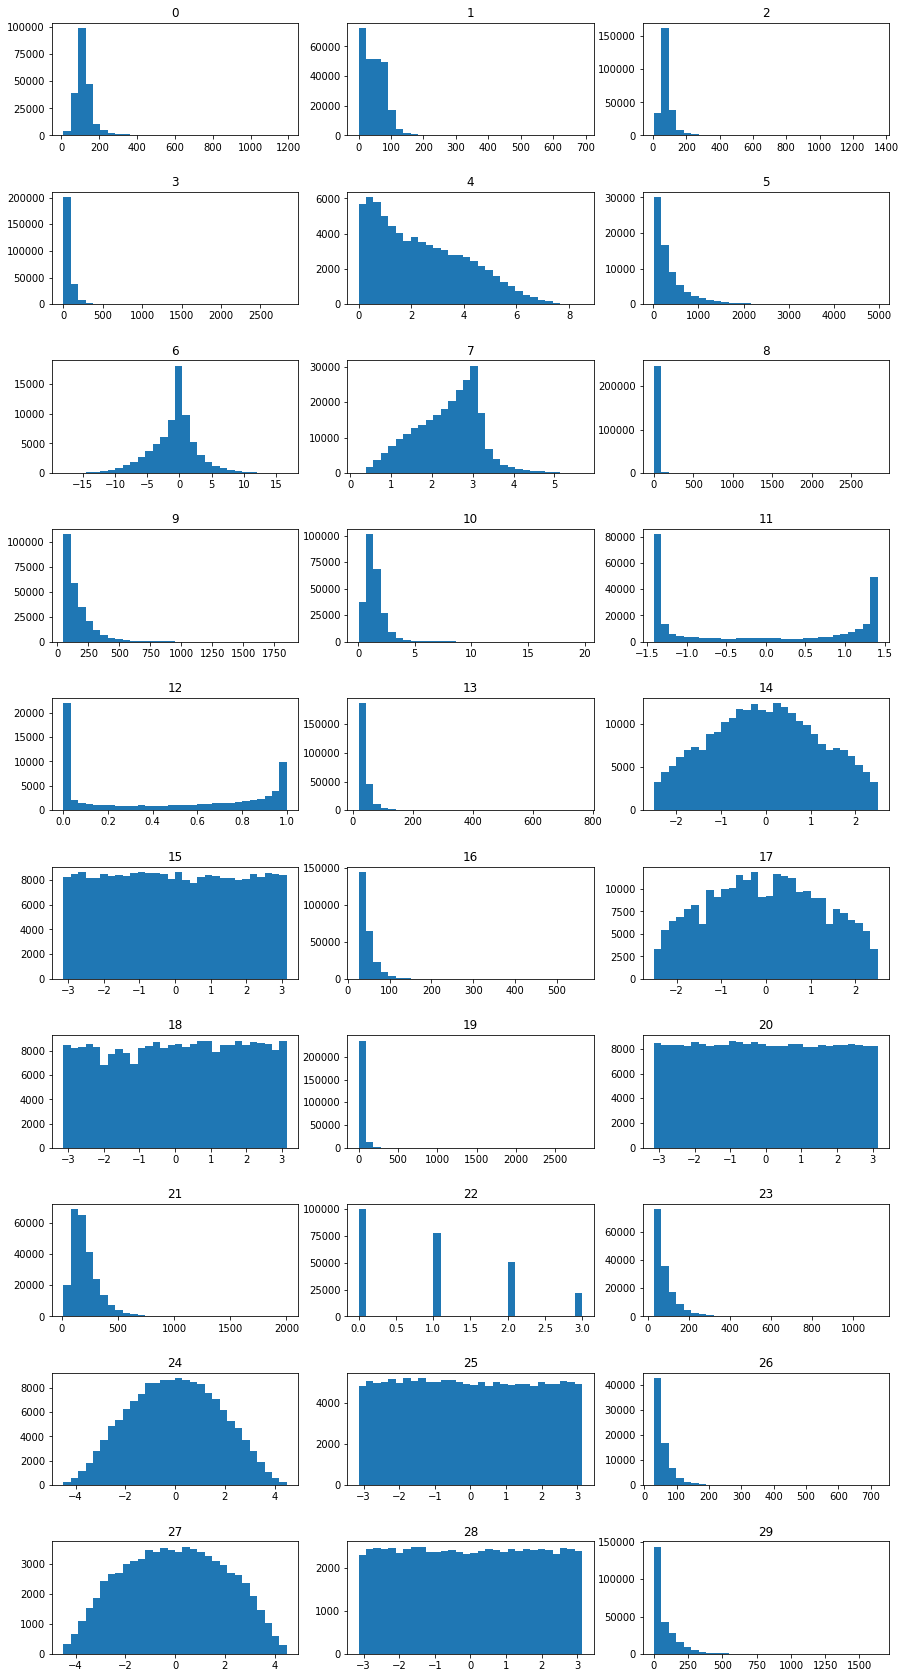

In [21]:
plot_hist(x)

In [9]:
# MAYBE TODO: DO PRINCIPLE COMPONENT ANALYSIS

**Correlation Matrix**

In [10]:
pred = np.c_[y,x]
correlation = pd.DataFrame(data=pred).corr()

In [11]:
data = pd.read_csv(data_path)
data['Prediction'].replace('s',1, inplace = True)
data['Prediction'].replace('b',-1, inplace = True)
correlation = data.corr()

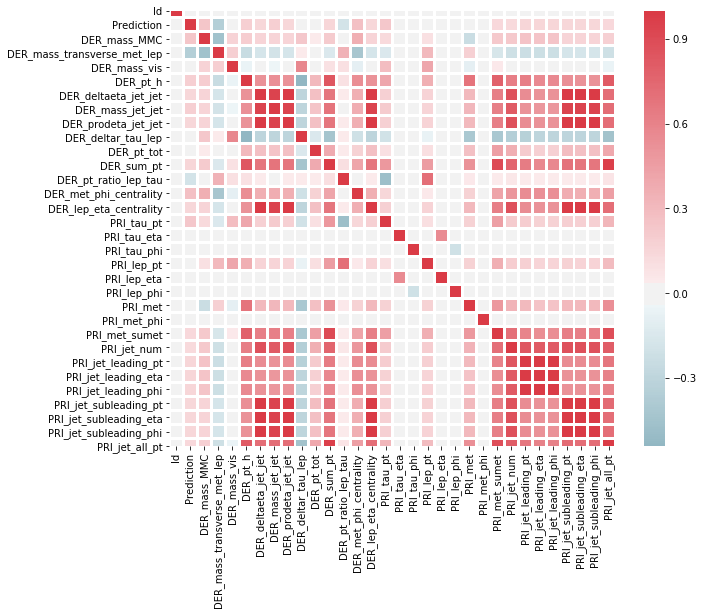

In [12]:
import seaborn as sns
f = plt.figure(figsize = (10,8))
sns.heatmap(correlation, cmap=sns.diverging_palette(220, 10, as_cmap=True), center = 0,  linewidths='2')

We see that some of the features are uncorrelated with the prediction, so we can remove these as they can cause overfitting and issues in the model.  

In [25]:
indices_s = np.argwhere(y[y == 1])
indices_b = np.argwhere(y[y == -1])

indices_s = np.reshape(indices_s, indices_s.shape[0])
indices_b = np.reshape(indices_b, indices_b.shape[0])



In [26]:
indices_b.shape


(164333,)

array([[160.937,  68.768, 103.235, ...,     nan,     nan,  46.226],
       [    nan, 162.172, 125.953, ...,     nan,     nan,  44.251],
       [143.905,  81.417,  80.943, ...,     nan,     nan,   0.   ],
       ...,
       [    nan,  58.179,  68.083, ...,     nan,     nan,   0.   ],
       [ 94.951,  19.362,  68.812, ...,     nan,     nan,   0.   ],
       [    nan,  72.756,  70.831, ...,     nan,     nan,   0.   ]])

In [60]:
x_s = x[y == 1]
x_b = x[y == -1]

x_b = x_b[:x_s.shape[0],:]



In [116]:
def dist_hists(hist1, hist2):
    dist = np.linalg.norm(hist1[0]-hist2[0], ord=2)
    return np.sqrt(dist)

Feature nr: 0
143.22520105239082


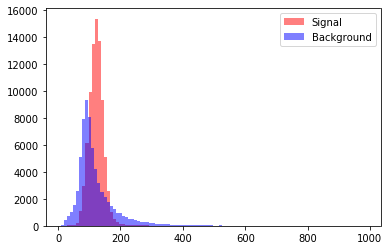

Feature nr: 1
123.84006550430031


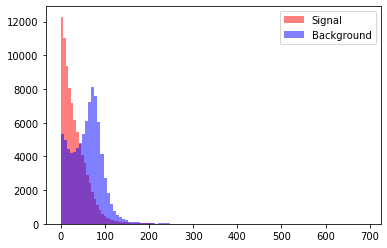

Feature nr: 2
173.51880215432976


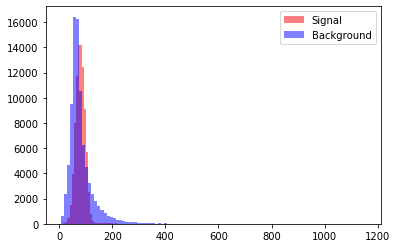

Feature nr: 3
116.02642866651652


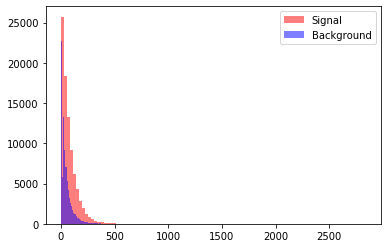

Feature nr: 4
43.396188100577156


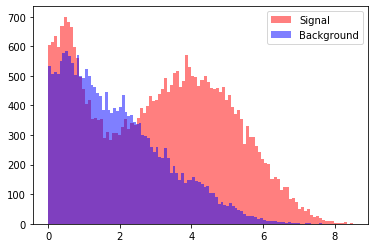

Feature nr: 5
58.23748732408574


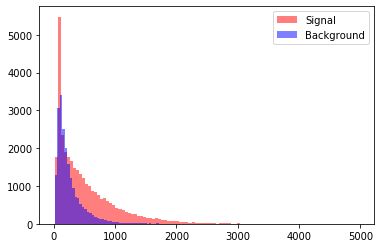

Feature nr: 6
56.569197109760616


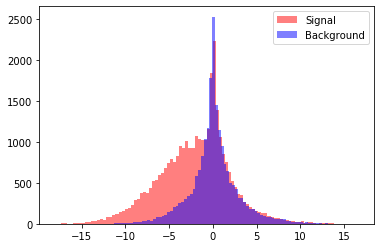

Feature nr: 7
76.73737659597336


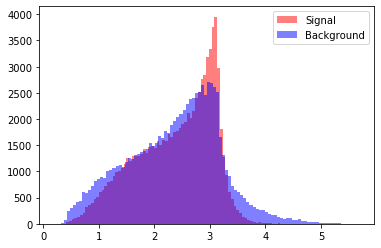

Feature nr: 8
206.4419007558569


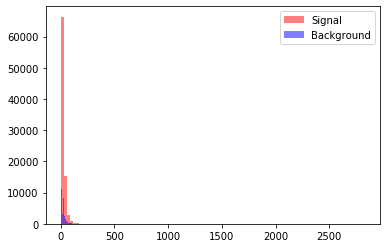

Feature nr: 9
105.4691160713437


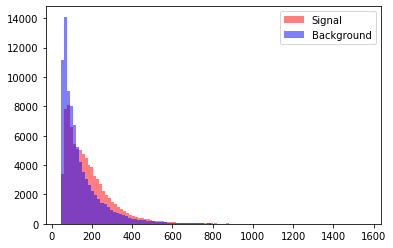

Feature nr: 10
118.58581069192164


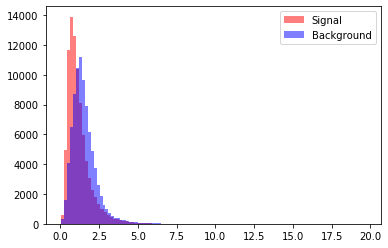

Feature nr: 11
106.95637056712083


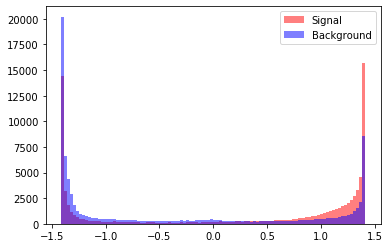

Feature nr: 12
60.38267298082225


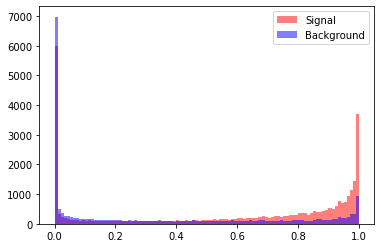

Feature nr: 13
110.51427811619713


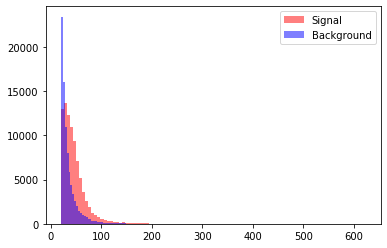

Feature nr: 14
44.16745935116173


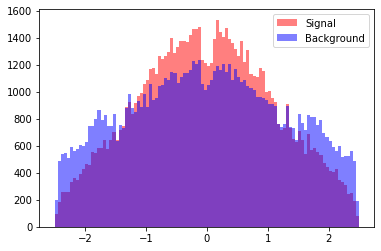

Feature nr: 15
22.597622081493686


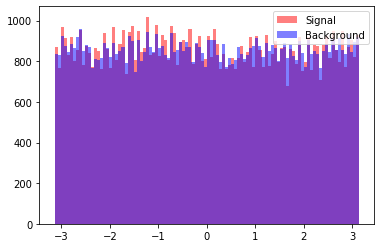

Feature nr: 16
48.646350422743176


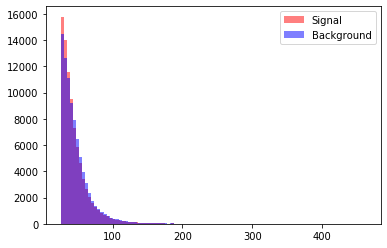

Feature nr: 17
50.85881846224885


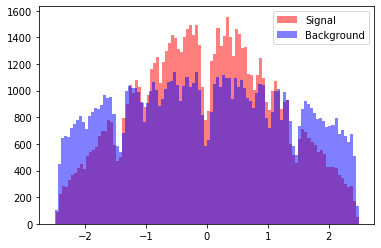

Feature nr: 18
21.146103430803212


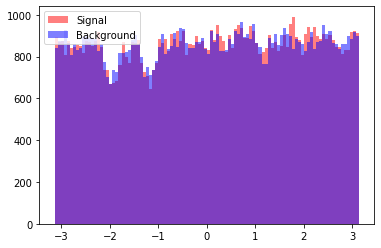

Feature nr: 19
207.16339215662106


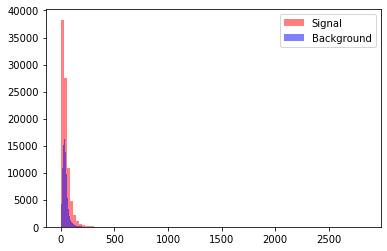

Feature nr: 20
21.020297731102435


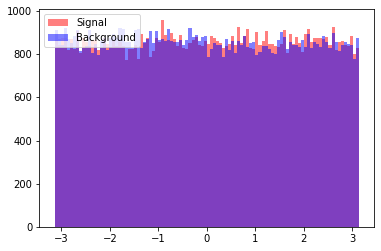

Feature nr: 21
102.86583938203874


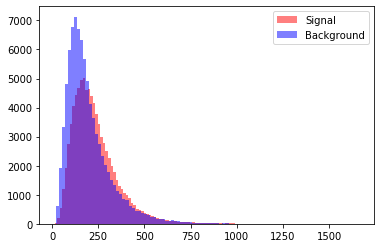

Feature nr: 22
136.60185141169038


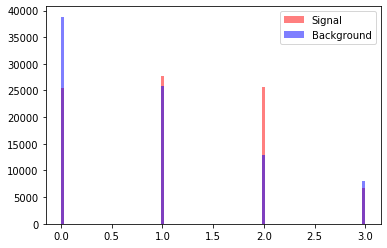

Feature nr: 23
88.12497052523099


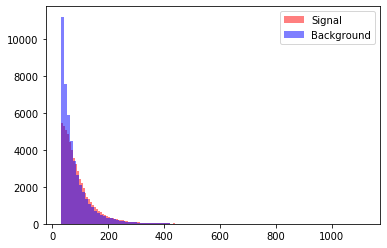

Feature nr: 24
45.33284580617484


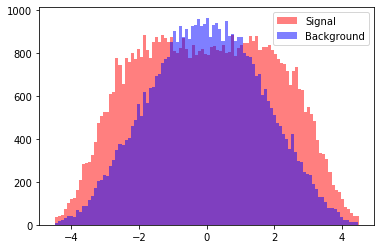

Feature nr: 25
37.042544965996065


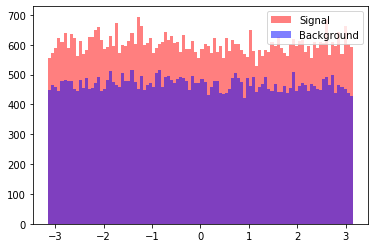

Feature nr: 26
51.65532378024653


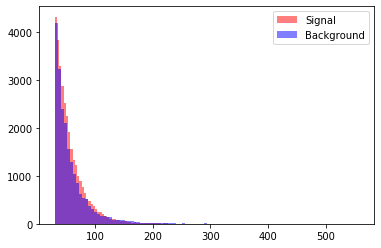

Feature nr: 27
38.77428756870136


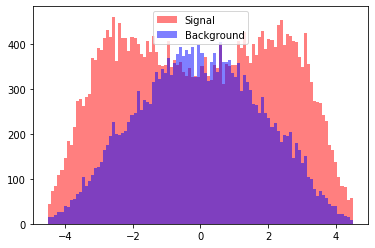

Feature nr: 28
34.27151155593242


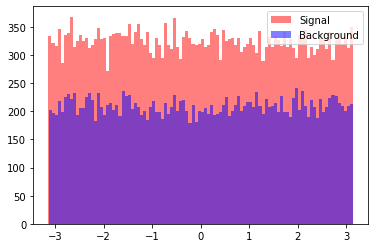

Feature nr: 29
124.92087812444144


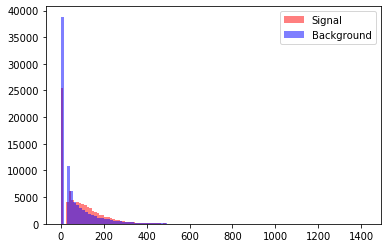

In [362]:
import time
dists = []
for i in range(30):
    print('Feature nr:', i )
    hist1 = plt.hist(x_s[:,i], color = 'r' , alpha = 0.5, bins = 100, label='Signal')
    hist2 = plt.hist(x_b[:,i], color = 'b', alpha = 0.5,  bins = 100, label='Background')
    dists.append(dist_hists(hist1, hist2))
    print(dists[i])
    plt.legend()
    plt.show()
    
    time.sleep(2)

#plot_hist(x_b)
#plt.show()

([<matplotlib.axis.XTick at 0x1218398d0>,
 <a list of 30 Text xticklabel objects>)

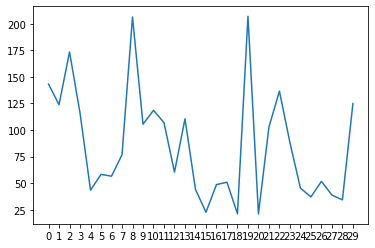

In [135]:
x_axis= np.arange(30)
plt.plot(x_axis,dists)
plt.xticks(x_axis)

In [325]:
dists = np.array(dists)
print(dists)
del_features = np.argwhere(dists < 50)

[143.22520105 123.8400655  173.51880215 116.02642867  43.3961881
  58.23748732  56.56919711  76.7373766  206.44190076 105.46911607
 118.58581069 106.95637057  60.38267298 110.51427812  44.16745935
  22.59762208  48.64635042  50.85881846  21.14610343 207.16339216
  21.02029773 102.86583938 136.60185141  88.12497053  45.33284581
  37.04254497  51.65532378  38.77428757  34.27151156 124.92087812]


In [339]:
del_features

array([[ 4],
       [14],
       [15],
       [16],
       [18],
       [20],
       [24],
       [25],
       [27],
       [28]])

In [372]:

x_c = fill_missing_values(x)
del_features = [7, 8, 11, 12,15,16,18, 20,22, 24, 25,26,28]

x_c = remove_features(x_c, del_features)
#x_col = remove_undefined_columns(x_cleaned)

#x_clean_median = set_undefined_to_median(x_col)
x_c = apply_log(x_c)

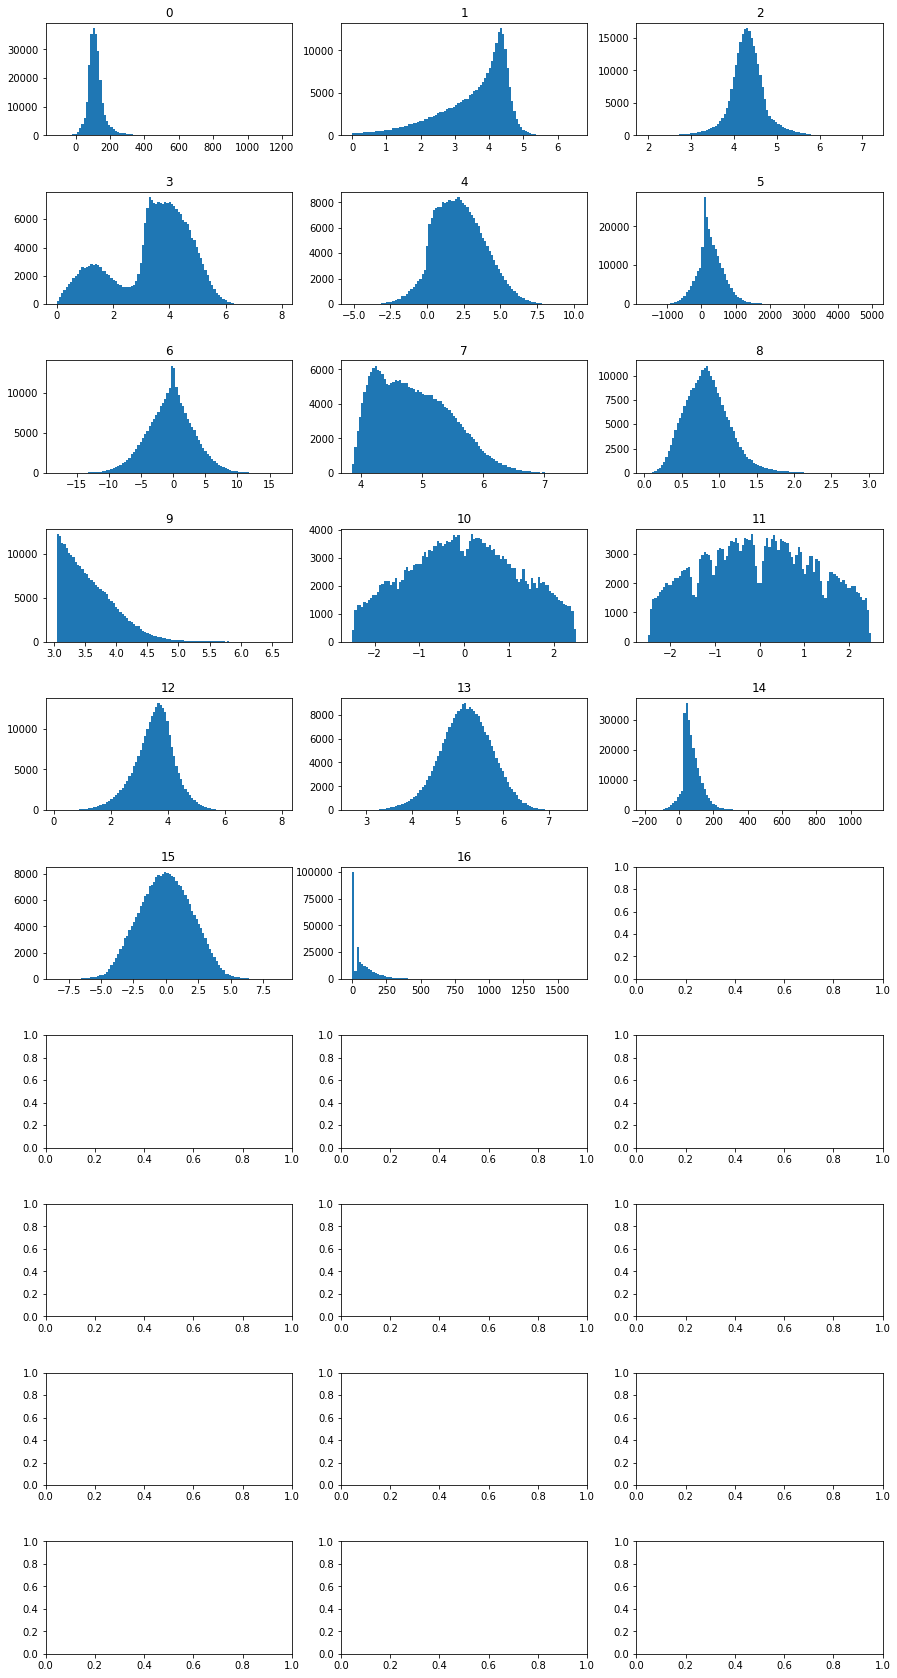

In [373]:
plot_hist(x_c)